In [1]:
import readers
from functions import plotagainstparam, percentage, read_results
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
print('READ_RESULTS INSTRUCTIONS')
print('----------------------------------------------')
print(read_results.__doc__)
print('-----------------------------------------------')
print('')
print('PERCENTAGE INSTRUCTIONS')
print('----------------------------------------------')
print(percentage.__doc__)
print('-----------------------------------------------')
print('')
print('PLOT AGAINST PARAM INSTRUCTIONS')
print('----------------------------------------------')
print(plotagainstparam.__doc__)
print('MATCHNAMES INSTRUCTIONS')
print('----------------------------------------------')
print(readers.matchnames.__doc__)

READ_RESULTS INSTRUCTIONS
----------------------------------------------

    Reads a list of files named with the string 'casename' (the actual case name)
    and with the extension of the parameter list passed.
    
    Requires the name of the file in which you can find the list of zones corresponding to the case
    
    Example: zones, timesdict, massdict, totalsdict = read_results('distance_','zones',distanceslist)
    
    Returns the dataframe for zones. A dictionary for the time summary and another for the mass summary both with the form:
    dictname = {distanceslist[0]: dataframe_0,distanceslist[1]:dataframe_1, ... }
    
    So you access to the dataframe of the first element in the parameter list with dictname[distanceslist[0]], where
    distanceslist[0] can be substituted for the actual value. Let's say it is 2, then timesdict[2] will return
    the time summary for 2 metres between students
    
    
-----------------------------------------------

PERCENTAGE INSTRUCTIO

In [3]:
#Social distancing example study
distance = [2,4]
ncoughpeople = [1,2,4]
renewalshour = [1,3,5]
masks = ['No_mask', 'Mask']
roomtemp = [288,298,308]
exposuretime = [60,120,240]
case = 'prueba_'

In [4]:
###SAMPLE IMPORT. RESULT ARE DICTIONARIES WITH THE DATAFRAMES INSIDE
zones, timesdict, massdict, totalsdict = read_results(case, 'zones', distance)

#zones, timesdict, massdict, totalsdict = read_results(case, 'zones', masks)

#TO ACCESS THE DATAFRAME OF A CERTAIN PARAMETER: timesdict[parameterkey]
#timesdict[2] is for 2 metre in the above import
#massdict[4] is for 4 metre in the above import
#you can pass the read_results function any of the parameter lists in the cell above

['2', 'unspecified', 'fluid', 'air', 'cell']
['6', 'mouth_teacher', 'wall', 'air', 'face']
['5', 'mouth_student', 'wall', 'air', 'face']
['13', 'ventilation_outlet', 'mass-flow-outlet', 'dummy', 'face']
['3', 'interior-unspecified', 'interior', 'dummy', 'face']
['4', 'desk', 'wall', 'air', 'face']
['7', 'room_ceiling', 'wall', 'air', 'face']
['8', 'room_floor', 'wall', 'air', 'face']
['9', 'room_walls', 'wall', 'air', 'face']
['10', 'student', 'wall', 'air', 'face']
['11', 'teacher', 'wall', 'air', 'face']
['12', 'ventilation_inlet', 'mass-flow-inlet', 'dummy', 'face']
Unconsidered Fate: ['----', '------', '----------']
Unconsidered Fate: ['----', '------']
Unconsidered Fate: ['Net', '77952']
COUNTER IS 2
ignore line []
ignore line []
ignore line ['Fate', 'Mass', '(kg)']
ignore line ['Net', '1.305e-03', '3.855e-04', '-9.195e-04']
finished reading
Unconsidered Fate: ['----', '------', '----------']
Unconsidered Fate: ['----', '------']
Unconsidered Fate: ['Net', '64512']
COUNTER IS 2
ig

In [5]:
timesdict['Mask']

KeyError: 'Mask'

In [6]:
totalsdict[2]

{'Particles': 77952, 'Mass': 0.001305}

In [7]:
#timesdict['No_mask'] = percentage(timesdict['No_mask'],'Number','Particles',totalsdict['No_mask'])
timesdict[2] = percentage(timesdict[2],'Number','Particles',totalsdict[2])

In [8]:
#timesdict['No_mask']
timesdict[2]

,Fate,Number,Min,Max,Avg,Stdev,injection,Particles %
1,Evaporated,36479,0.001789,0.035000,0.010880,0.007135,h2o,46.796747
2,inFluid,41472,0.000000,0.070000,0.030250,0.021520,h2o,53.201970
3,6,1,0.004477,0.004477,0.004477,0.000000,h2o,0.001283


In [9]:
print(timesdict[2].Avg)
print(timesdict[2]['Avg'])
print(timesdict[2]['Number'])

1    0.010880
2    0.030250
3    0.004477
Name: Avg, dtype: float64
1    0.010880
2    0.030250
3    0.004477
Name: Avg, dtype: float64
1    36479
2    41472
3        1
Name: Number, dtype: int64


In [10]:
for key,item in timesdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesdict[key] = percentage(timesdict[key],'Number','Particles',totalsdict[key])
    timesdict[key], _matchlist = readers.matchnames(zones,timesdict[key])

Particles %  already exists overwrite?


y/n y


Text(0.5, 1.0, 'Trapped particles in %')

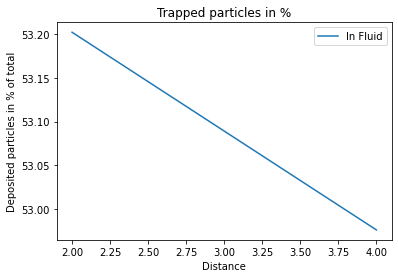

In [11]:
plotagainstparam(timesdict,'Particles %','Fluid','Distance','Deposited particles in % of total','In Fluid')
#plotagainstparam(timesdict,'Particles %','teacher','Distance','Deposited particles in % of total','On teacher')
plt.title('Trapped particles in %')

## Here we write our plotting code
You access the data of the columns in dataframes by df['nameofcolumn'] where df is the name of your dataframe (times, zones, mass)